### __<font color="Green">Project Title : Handwritten Digit Recognition using Deep Leraning (Neural Network);</font>__
Question : What Does It Do?
Ans : It Recognise the handwritten digit.

In [1]:
from sklearn.datasets import fetch_openml
import numpy as np
import matplotlib.pyplot as plt

# Load the MNIST dataset
mnist = fetch_openml('mnist_784', version=1)
data, y = np.array(mnist.data, dtype='float32'), np.array(mnist.target, dtype='int')

# Reshape the data into 28x28 images
print(f"Dimension of data: {data.shape}")
# data = data.reshape(-1, 28, 28)
data = data.reshape(-1, 784,1)
print(f"Dimension of data: {data.shape}")



Dimension of data: (70000, 784)
Dimension of data: (70000, 784, 1)


### Spliting The data into 80% and 20%

In [3]:
# Split the data into training and testing sets
num_train = 60000
X_train, X_test = data[:num_train], data[num_train:]
y_train, y_test = y[:num_train], y[num_train:]

# Normalize the data
div = X_test.max()
X_test = X_test / div
X_train = X_train / div



### Sigmoid and Loss Function definitions

In [4]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def cross_entropy_loss(y_true, y_pred):
    epsilon = 1e-15  # small constant to avoid log(0)
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)  # clip values to avoid log(0) or log(1)
    return -np.sum(y_true * np.log(y_pred)) / len(y_true)

### Pridiction Function

In [5]:
def predict(W1, b1, W2, b2, X):
    # Forward Propagation
    Z1 = np.dot(W1, X) + b1
    A1 = sigmoid(Z1)

    Z2 = np.dot(W2, A1) + b2
    A2 = sigmoid(Z2)

    predicted_class = np.argmax(A2)

    return predicted_class



### Acuracy Calculation

In [6]:
def calculate_accuracy(W1, b1, W2, b2, X, y):
    correct_predictions = 0

    for i in range(len(X)):
        # Predict the class for each example
        prediction = predict(W1, b1, W2, b2, X[i])

        # Check if the prediction is correct
        if prediction == y[i]:
            correct_predictions += 1

    accuracy = correct_predictions / len(X)
    return accuracy

### Weight Intialization

In [7]:
trained_W1, trained_b1, trained_W2, trained_b2 = None, None, None, None    

def initialize_parameters(num_features, num_hidden_units, num_output_units):
    # Use He initialization for weights
    W1 = np.random.randn(num_hidden_units, num_features) * np.sqrt(2. / (num_features + num_hidden_units))
    #W1 = np.random.randn(num_hidden_units, num_features)
    b1 = np.zeros((num_hidden_units, 1))
    W2 = np.random.randn(num_output_units, num_hidden_units) * np.sqrt(2. / (num_hidden_units + num_output_units))
    #W2 = np.random.randn(num_output_units, num_hidden_units) 
    b2 = np.zeros((num_output_units, 1))


    
    return W1, b1, W2, b2

[Delta Rule](https://www.youtube.com/watch?v=vsWrXfO3wWw)
[BackPropagation Chain Rule](https://www.youtube.com/watch?v=sIX_9n-1UbM&t=560s)
[Neural Network Mathematics](https://www.youtube.com/watch?v=aircAruvnKk&list=PLZHQObOWTQDNU6R1_67000Dx_ZCJB-3pi&index=1&t=339s)

### Model Architechure and gradient descent function
1. Forword Propagation
2. Loss Calculation
3. Backpropagation


In [8]:
import numpy as np
from tqdm import tqdm

def gradient_descent(X_train, y_train, learning_rate=0.1, epochs=1):
    num_features = X_train.shape[1]
    num_hidden_units = 16
    num_output_units = 10

    # Initialize parameters
    # Check if trained parameters are available
    if trained_W1 is not None:
        W1 = trained_W1
        b1 = trained_b1
        W2 = trained_W2
        b2 = trained_b2
    else:
        # If not, initialize parameters
        W1, b1, W2, b2 = initialize_parameters(num_features, num_hidden_units, num_output_units)

    for epoch in range(epochs):
        epoch_loss = 0

        # Use tqdm for the progress bar
        for i in tqdm(range(len(X_train)), desc=f'Epoch {epoch} Loss: {epoch_loss}'):
            # Forward Propagation
            Input = X_train[i]
            
            Z1 = np.dot(W1, Input) + b1
            A1 = sigmoid(Z1)
   
            Z2 = np.dot(W2, A1) + b2
            A2 = sigmoid(Z2)
            
            if i== 0:
                print(Z2.max(),Z1.min(),Z1.max(),Z1.min())

            # if i == 0:
            #     print("A1 :",A1.T[0])
            #     print("A2 :",A2.T[0])
            # Error Propagation
            y_true = np.zeros((num_output_units, 1))
            y_true[y_train[i]] = 1

            dz2 = A2 - y_true
            #Backpropagation
            dw2 = np.dot(dz2, A1.T) * A2 * (1 - A2) 
            db2 = np.sum(dz2, axis=1, keepdims=True)

            dz1 = np.dot(W2.T, dz2) * A1 * (1 - A1)
            dw1 = np.dot(dz1, Input.T)
            db1 = np.sum(dz1, axis=1, keepdims=True)

            # Update Parameters
            W2 -= learning_rate * dw2
            b2 -= learning_rate * db2
            W1 -= learning_rate * dw1
            b1 -= learning_rate * db1

            # Calculate and accumulate loss
            loss = cross_entropy_loss(A2, y_true)
            epoch_loss += loss

        # Print or log the average loss for the epoch
        average_loss = epoch_loss / len(X_train)
        print(f"Epoch {epoch}, Average Loss: {average_loss}, Accuracy :{calculate_accuracy(W1, b1, W2, b2,X_test, y_test)*100}%")
    
    return W1, b1, W2, b2

# Example Usage
# Assuming X_train, y_train are defined
# X_train: Input data (m, 728), y_train: Target data (m,)

# Set up initial weights and biases randomly
trained_W1, trained_b1, trained_W2, trained_b2 = gradient_descent(X_train, y_train, learning_rate=0.01, epochs=5)

Epoch 0 Loss: 0:   0%|          | 202/60000 [00:00<00:29, 2014.09it/s]

0.9638963212768606 -1.0147159158509138 1.4721195209221263 -1.0147159158509138


Epoch 0 Loss: 0: 100%|██████████| 60000/60000 [00:26<00:00, 2302.38it/s]


Epoch 0, Average Loss: 1.9546761703848445, Accuracy :89.79%


Epoch 1 Loss: 0:   1%|          | 481/60000 [00:00<00:25, 2298.04it/s]

0.10255150779825328 -7.566275024383943 7.953018826664603 -7.566275024383943


Epoch 1 Loss: 0: 100%|██████████| 60000/60000 [00:27<00:00, 2189.06it/s]


Epoch 1, Average Loss: 0.9350564727114329, Accuracy :91.08000000000001%


Epoch 2 Loss: 0:   0%|          | 202/60000 [00:00<00:30, 1981.20it/s]

0.11881914410064454 -10.169371497171994 7.8622747115021365 -10.169371497171994


Epoch 2 Loss: 0: 100%|██████████| 60000/60000 [00:27<00:00, 2164.31it/s]


Epoch 2, Average Loss: 0.7396559739208679, Accuracy :91.67999999999999%


Epoch 3 Loss: 0:   0%|          | 202/60000 [00:00<00:30, 1965.88it/s]

0.023449146992028602 -12.324462758352794 7.291899192118397 -12.324462758352794


Epoch 3 Loss: 0: 100%|██████████| 60000/60000 [00:27<00:00, 2186.71it/s]


Epoch 3, Average Loss: 0.6476951892360067, Accuracy :92.05%


Epoch 4 Loss: 0:   0%|          | 171/60000 [00:00<00:36, 1654.33it/s]

0.5410476296676716 -14.1899614612658 6.84330766731156 -14.1899614612658


Epoch 4 Loss: 0: 100%|██████████| 60000/60000 [00:26<00:00, 2229.57it/s]


Epoch 4, Average Loss: 0.5915364293333811, Accuracy :92.31%


### The Checking the Accuracy

In [9]:
print(f"Accuracy :{calculate_accuracy(trained_W1, trained_b1, trained_W2, trained_b2,X_test, y_test)*100}%")

Accuracy :92.31%


### Testing The Model 
by taking the random image from test data

Predicted Class: 3
Actual Class : 3


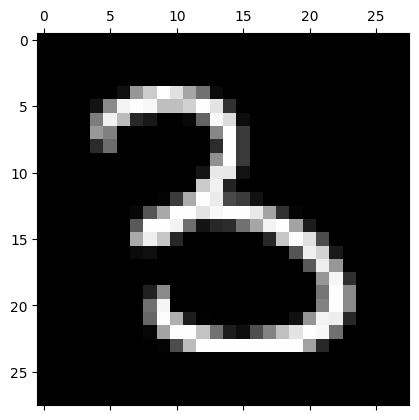

In [34]:
import random
random_integer = random.randint(0, 1000)


def predict(W1, b1, W2, b2, X):
    # Forward Propagation
    Z1 = np.dot(W1, X ) + b1
    A1 = sigmoid(Z1)

    Z2 = np.dot(W2, A1) + b2
    A2 = sigmoid(Z2)

    # Assuming A2 represents the probabilities for each class
    # Choose the class with the highest probability as the predicted class
    predicted_class = np.argmax(A2)

    return predicted_class

# Example Usage
# Assuming X_test is the test dataset
# X_test: Input data (m, 728)

# Predict for the first example in the test dataset
prediction = predict(trained_W1, trained_b1, trained_W2, trained_b2, X_test[random_integer])
print("Predicted Class:", prediction)

plt.matshow(X_test[random_integer].reshape(28, 28), cmap='gray')
print("Actual Class :",y_test[random_integer])

### Saving the model Data

In [11]:
import numpy as np

# Assuming you have trained_W1, trained_b1, trained_W2, trained_b2

# Save the weights to a file
np.savez('trained_weights.npz', W1=trained_W1, b1=trained_b1, W2=trained_W2, b2=trained_b2)

### Geting The data from saved model

In [12]:

loaded_weights = np.load('trained_weights.npz')

trained_W1 = loaded_weights.get("W1")
trained_b1 = loaded_weights.get("b1")
trained_W2 = loaded_weights.get("W2")
trained_b2 = loaded_weights.get("b2")
print(f"Accuracy :{calculate_accuracy(trained_W1, trained_b1, trained_W2, trained_b2,X_test, y_test)*100}%")

Accuracy :92.31%


In [13]:
y_predicted = []
for i in range(len(X_test)):
    y_predicted.append(predict(trained_W1, trained_b1, trained_W2, trained_b2, X_test[i]))

### Analysing the Confusion Matrix

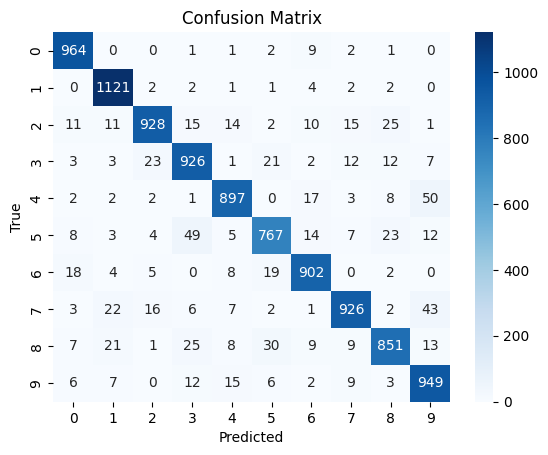

In [14]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Assuming you have the variables y_true and y_predicted

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_predicted)

# Plot the confusion matrix as a heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

